In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=';')
data = data[data['total sulfur dioxide']<200] # drop a few outliers



In [40]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data_orig = pd.read_csv(url,sep=';')
data_orig = data[data['total sulfur dioxide']<200] 

In [42]:
data_orig

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,NaN,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
# Set 10 random values in 'residual sugar' column to NaN
random_indices = np.random.choice(data.index, size=10, replace=False)
data.loc[random_indices, 'residual sugar'] = np.nan

# Create train and test sets
train_set = data.dropna(subset=['residual sugar'])
test_set = data.loc[random_indices]

# Separate labels
train_labels = train_set['residual sugar']
test_labels = test_set['residual sugar']

# Drop 'residual sugar' column from train and test sets
train_set = train_set.drop(columns=['residual sugar'])
test_set = test_set.drop(columns=['residual sugar'])

In [41]:
data_orig.loc[random_indices, 'residual sugar']

69     NaN
1457   NaN
1360   NaN
955    NaN
947    NaN
286    NaN
323    NaN
1142   NaN
894    NaN
985    NaN
Name: residual sugar, dtype: float64

In [36]:
train_set.shape

(1567, 11)

In [38]:
data.shape

(1597, 12)

In [17]:
random_indices

array([1597,  673,   73,  241, 1302, 1390,  402, 1389,   86,  337])

In [6]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,NaN,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
resp = torch.tensor(data.loc[:, 'residual sugar'].values).float()
resp = resp[:, None]

In [11]:
data_X = data.drop(columns=['residual sugar'])

In [15]:
data_X.shape

(1597, 11)

In [ ]:
# Filter out any indices that are out of bounds
valid_indices = random_indices[random_indices < len(data_X)]
train_data = data_X.iloc[valid_indices, :]

IndexError: positional indexers are out-of-bounds

In [7]:
def CreateDataLoaders(Dataset, BatchSize = 0, TestSize = .2, Shuffle = True, DropLast = True, Use_ScalerMinMax = False, Use_ScalerStandard = False):
    # create a dataframe
    resp = torch.tensor(Dataset.iloc[:, -1].values).float()
    resp = resp[:, None]
    
    data_X = Dataset.iloc[:, :-1]
    
    if Use_ScalerMinMax == True:
        data_tmp = MinMaxScaler().fit_transform(data_X)
        data = torch.tensor(data_tmp).float()
        del data_tmp

    elif Use_ScalerStandard == True:
        data_tmp = StandardScaler().fit_transform(data_X)
        data = torch.tensor(data_tmp).float()
        del data_tmp
    
    else:
        data = torch.tensor(data_X.values).float()
    
    # split the data into training and testing sets
    train_data,test_data, train_labels,test_labels = train_test_split(data, resp, test_size=TestSize)

    # then convert them into PyTorch Datasets (note: already converted to tensors)
    train_data = TensorDataset(train_data,train_labels)
    test_data  = TensorDataset(test_data,test_labels)

    # finally, translate into dataloader objects
    train_loader = DataLoader(train_data,batch_size=BatchSize,shuffle=Shuffle,drop_last=DropLast)
    test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])
    
    return train_loader, test_loader

In [8]:
train_loader, test_loader = CreateDataLoaders(df, BatchSize = 2, TestSize = .2, Shuffle = True, DropLast = True, Use_ScalerMinMax = False, Use_ScalerStandard = False)

In [9]:
next(iter(test_loader))

[tensor([[-4., -6.],
         [ 7., -4.]]),
 tensor([[-10.],
         [  3.]])]

In [13]:
# create a class for the model
def CreateANNModel(nInput=2, nUnits=8, nLayers=2, lossFunc='MSELoss', Optimizer='Adam', 
                   LearningRate=0.01, ActivationFunc='ReLU', DropoutRate=0.0, WeightDecay=0.00, 
                   BatchNorm=False, Momentum=0.9):

    class ANNtorch(nn.Module):
        def __init__(self, nInput=2, nLayers=2, nUnits=8, ActivationFunc='ReLU', DropoutRate=0.1):
            super().__init__()

            # create dictionary to store the layers
            self.layers = nn.ModuleDict()
            self.nLayers = nLayers
            self.activation = getattr(F, ActivationFunc.lower())
            self.dropout = nn.Dropout(DropoutRate)

            ### input layer
            self.layers['input'] = nn.Linear(nInput, nUnits)
            
            ### hidden layers
            for i in range(nLayers):
                self.layers[f'hidden{i}'] = nn.Linear(nUnits, nUnits)
                if BatchNorm == True:
                    self.layers[f'batchnorm{i}'] = nn.BatchNorm1d(nUnits)

            ### output layer
            self.layers['output'] = nn.Linear(nUnits, 1)
        
        # forward pass
        def forward(self, x):
            # input layer
            x = self.activation(self.layers['input'](x))
            x = self.dropout(x)

            # hidden layers
            for i in range(self.nLayers):
                x = self.activation(self.layers[f'hidden{i}'](x))
                if BatchNorm == True:
                    x = self.layers[f'batchnorm{i}'](x)
                x = self.dropout(x)
            
            # return output layer
            x = self.layers['output'](x)
            return x

    # create the model
    ANNModel = ANNtorch(nInput, nLayers, nUnits, ActivationFunc, DropoutRate)
    
    lossFunc = getattr(nn, lossFunc)    
    lossfun = lossFunc()
    
    optimizerFunc = getattr(torch.optim, Optimizer)
    if Optimizer == 'SGD':
        optimizer = optimizerFunc(ANNModel.parameters(), lr=LearningRate, weight_decay=WeightDecay, momentum=Momentum)
    else:
        optimizer = optimizerFunc(ANNModel.parameters(), lr=LearningRate, weight_decay=WeightDecay)
    
    return ANNModel, lossfun, optimizer


In [20]:
ANNModel, lossfun, optimizer = CreateANNModel(lossFunc='MSELoss', Optimizer='Adam', ActivationFunc='relu', LearningRate=0.01)

In [21]:
num_epochs = 2

In [29]:
losses = torch.zeros(num_epochs,2)

In [22]:
# initialize losses
losses_train = torch.zeros(num_epochs)
losses_test = torch.zeros(num_epochs)

In [37]:
num_epochs = 100

In [69]:
def TrainModel(df, num_epochs = 100, BatchSize = 2, TestSize = .2, Shuffle = True, DropLast = True, Use_ScalerMinMax = False, Use_ScalerStandard = False,
               nInput=2, nUnits=8, nLayers=2, lossFunc='MSELoss', Optimizer='Adam', LearningRate=0.01, ActivationFunc='ReLU', DropoutRate=0.0, 
               WeightDecay=0.00, BatchNorm=False, Momentum=0.9):

    num_epochs = num_epochs

    train_loader, test_loader = CreateDataLoaders(  df, BatchSize, TestSize, Shuffle, DropLast, Use_ScalerMinMax, Use_ScalerStandard)

    ANNModel, lossfun, optimizer = CreateANNModel(  nInput, nUnits, nLayers, lossFunc, Optimizer, LearningRate, ActivationFunc, DropoutRate, WeightDecay, 
                                                    BatchNorm, Momentum   )
    losses = torch.zeros(num_epochs,2)
    accuracy = torch.zeros(num_epochs,2)


    for epoch in range(num_epochs):

        ANNModel.train()
        batchLoss = []
        batchAcc = []

        #Train
        for X, y in train_loader:
            yHat = ANNModel(X)
            loss = lossfun(yHat, y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from this batch
            batchLoss.append(loss.item())
            
            # compure sort of acccuracy
            accuracyPct = 100*torch.mean((torch.round(yHat) == y).float()).item()
            batchAcc.append(accuracyPct)
            
        losses[epoch,0] = np.sum(batchLoss)
        accuracy[epoch,0] = np.mean(batchAcc)
        
        #Test
        ANNModel.eval()
        X, y = next(iter(test_loader))
        with torch.no_grad():
            yHat = ANNModel(X)
        losses[epoch,1] = lossfun(yHat, y)
        accuracy[epoch,1] = 100*torch.mean((torch.round(yHat) == y).float()).item()
        
        # print out the epoch, training loss, and test loss for each 5th epoch
        if (epoch % 5 == 0) & (epoch > 0):
            #print(f'Epoch {epoch} - Training Loss: {losses[epoch,0]:.4f} - Test Loss: {losses[epoch,1]:.4f} - Train Accuracy: {accuracy[epoch,0]:.2f}% - Test Accuracy: {accuracy[epoch,1]:.2f}%')
            print(f'Epoch {epoch} - Training Loss: {losses[epoch - 5:epoch,0].mean():.4f} - Test Loss: {losses[epoch - 5:epoch,1].mean():.4f} - Train Accuracy: {accuracy[epoch - 5:epoch,0].mean():.2f}% - Test Accuracy: {accuracy[epoch - 5:epoch,1].mean():.2f}%')
    return ANNModel, losses, accuracy, train_loader, test_loader, ANNModel, lossfun, optimizer


In [62]:
losses[10-5:10,0].mean()

tensor(19.8094)

Epoch 5 - Training Loss: 3340.4351 - Test Loss: 0.0206 - Train Accuracy: 87.47% - Test Accuracy: 99.07%


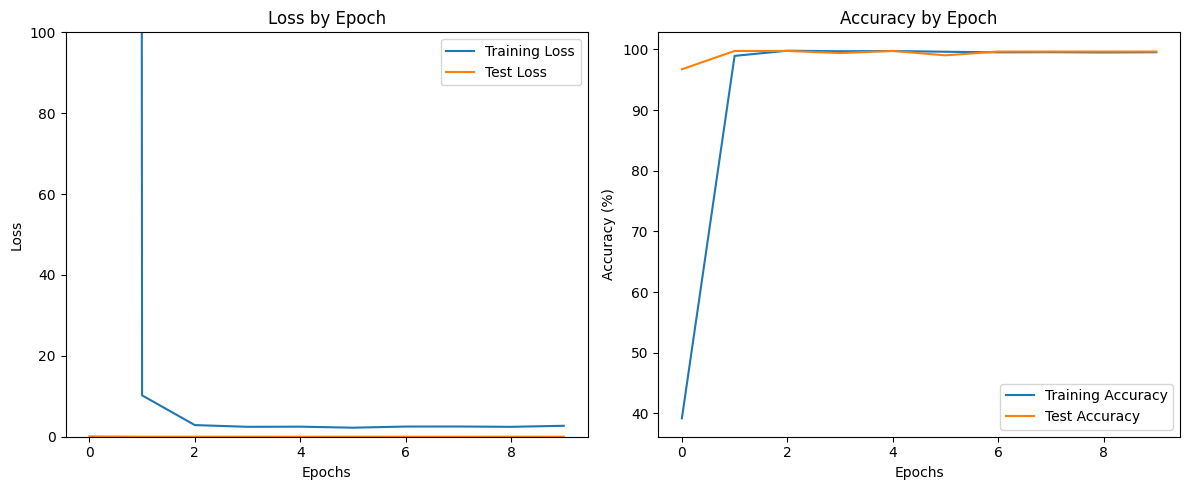

In [ ]:
df = createDataFrame(size = 2000)
ANNModel, losses, accuracy, train_loader, test_loader, ANNModel, lossfun, optimizer = TrainModel(df, num_epochs=10, BatchSize=32, Use_ScalerMinMax= True,LearningRate=0.001,nUnits=12,nLayers=3,WeightDecay=0.05)
PlotResults()

Epoch 5 - Training Loss: 2920.9836 - Test Loss: 47.5343 - Train Accuracy: 7.88% - Test Accuracy: 16.55%
Results of run: 0 completed


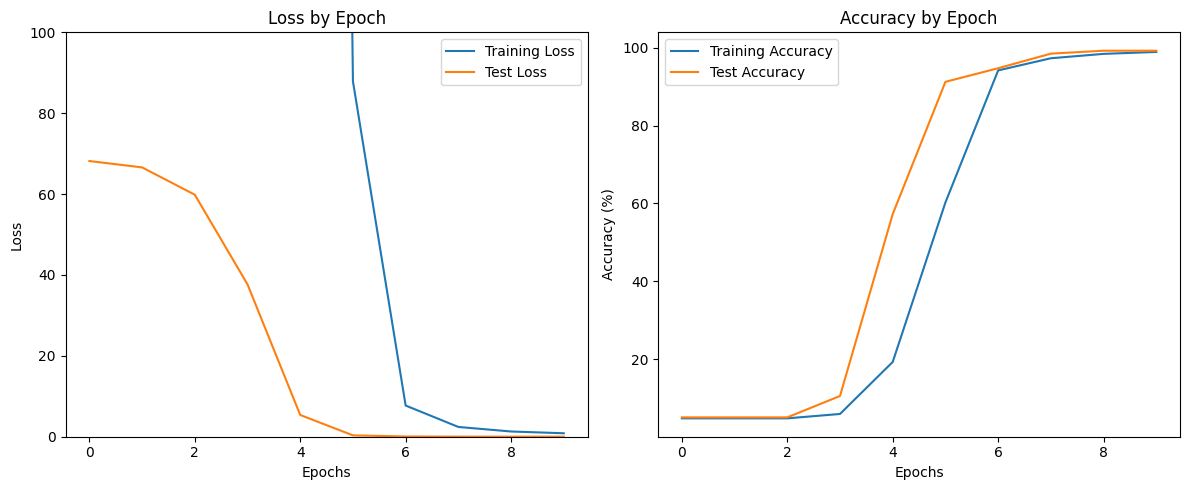

Epoch 5 - Training Loss: 3170.2615 - Test Loss: 49.6595 - Train Accuracy: 6.20% - Test Accuracy: 8.95%
Results of run: 1 completed


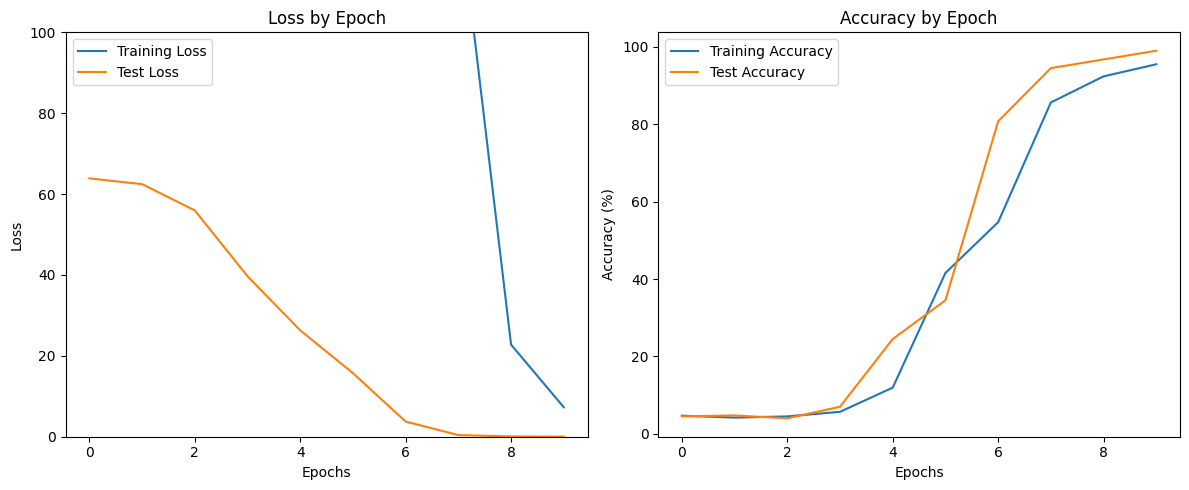

Epoch 5 - Training Loss: 2991.7585 - Test Loss: 53.2272 - Train Accuracy: 8.41% - Test Accuracy: 14.45%
Results of run: 2 completed


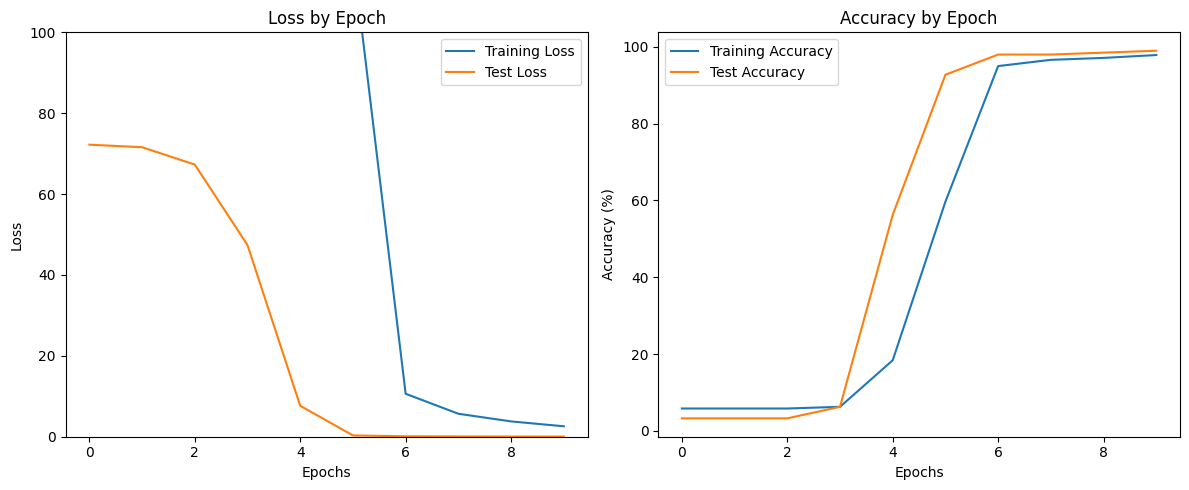

Epoch 5 - Training Loss: 2779.7571 - Test Loss: 46.2190 - Train Accuracy: 8.55% - Test Accuracy: 19.00%
Results of run: 3 completed


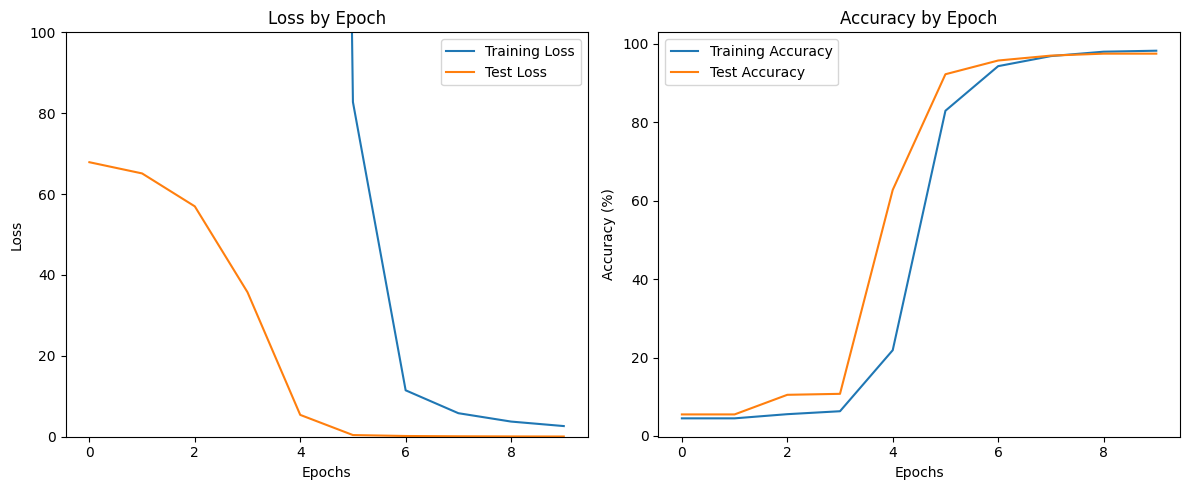

Epoch 5 - Training Loss: 3533.2129 - Test Loss: 58.7820 - Train Accuracy: 5.35% - Test Accuracy: 5.35%
Results of run: 4 completed


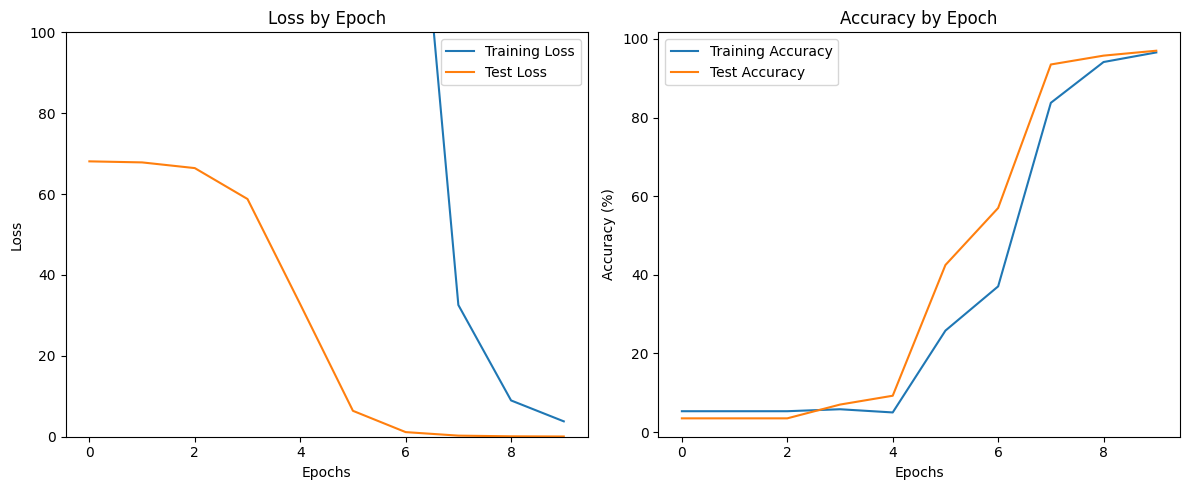

Epoch 5 - Training Loss: 2786.0718 - Test Loss: 49.4115 - Train Accuracy: 9.60% - Test Accuracy: 15.75%
Results of run: 5 completed


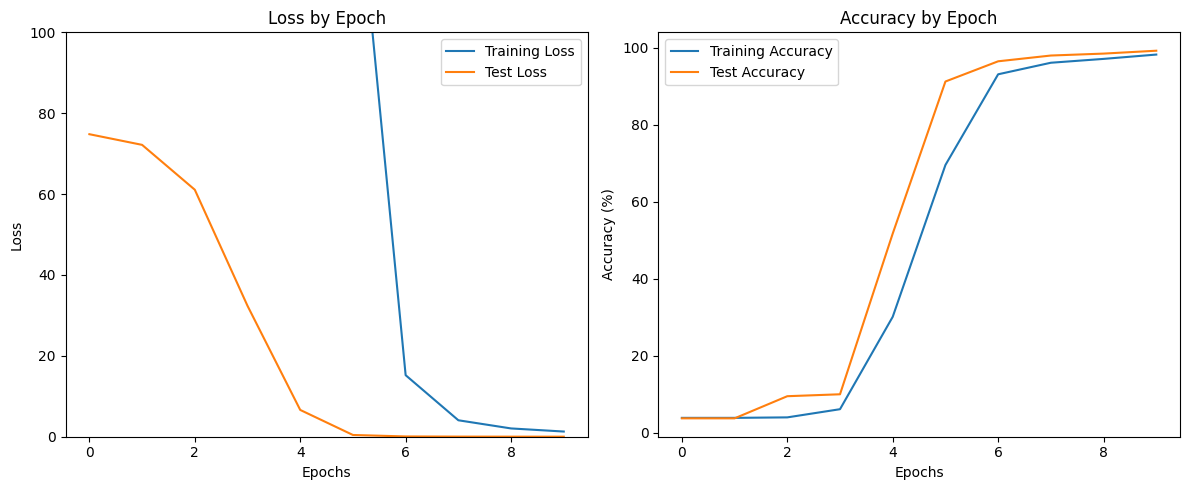

Epoch 5 - Training Loss: 3251.6738 - Test Loss: 64.3451 - Train Accuracy: 4.69% - Test Accuracy: 6.10%
Results of run: 6 completed


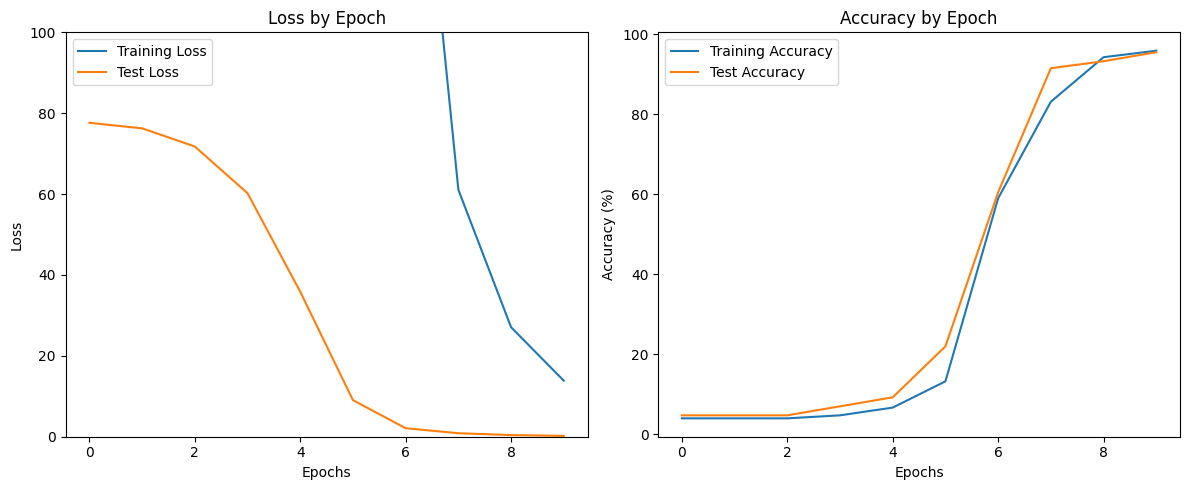

Epoch 5 - Training Loss: 2807.4075 - Test Loss: 44.7856 - Train Accuracy: 10.82% - Test Accuracy: 15.55%
Results of run: 7 completed


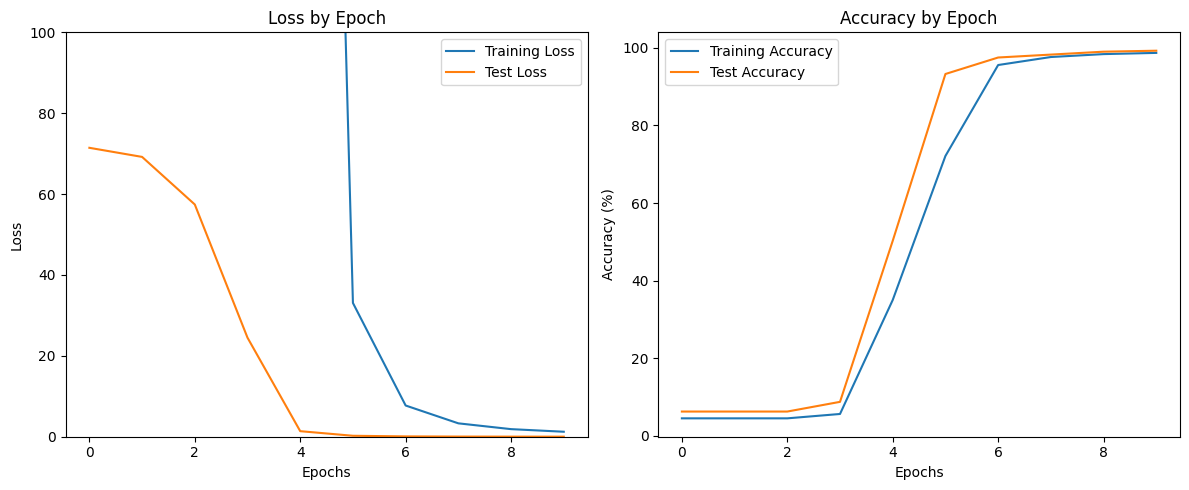

Epoch 5 - Training Loss: 3294.1216 - Test Loss: 63.9044 - Train Accuracy: 5.30% - Test Accuracy: 5.45%
Results of run: 8 completed


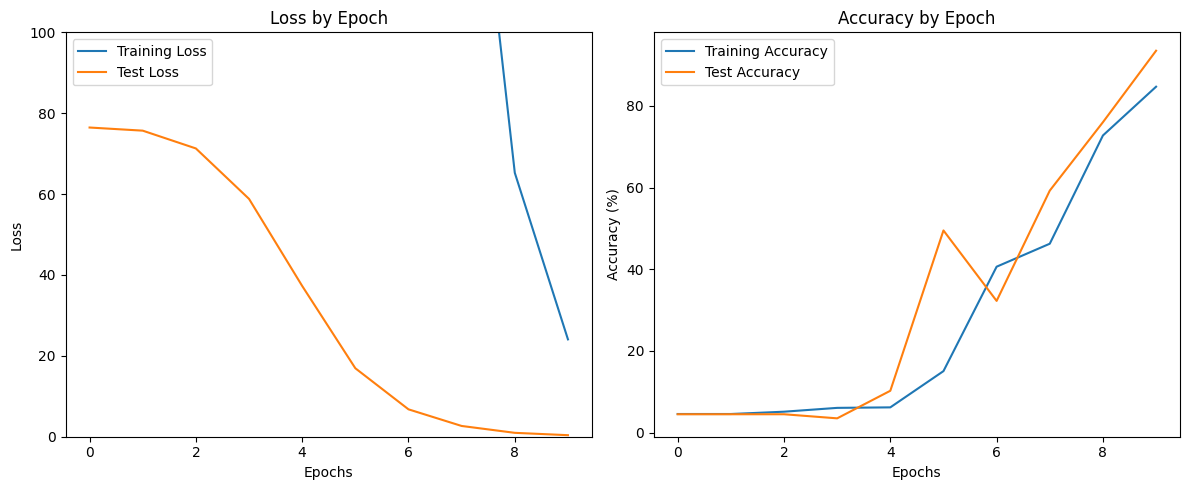

Epoch 5 - Training Loss: 3155.6868 - Test Loss: 63.4684 - Train Accuracy: 5.19% - Test Accuracy: 6.15%
Results of run: 9 completed


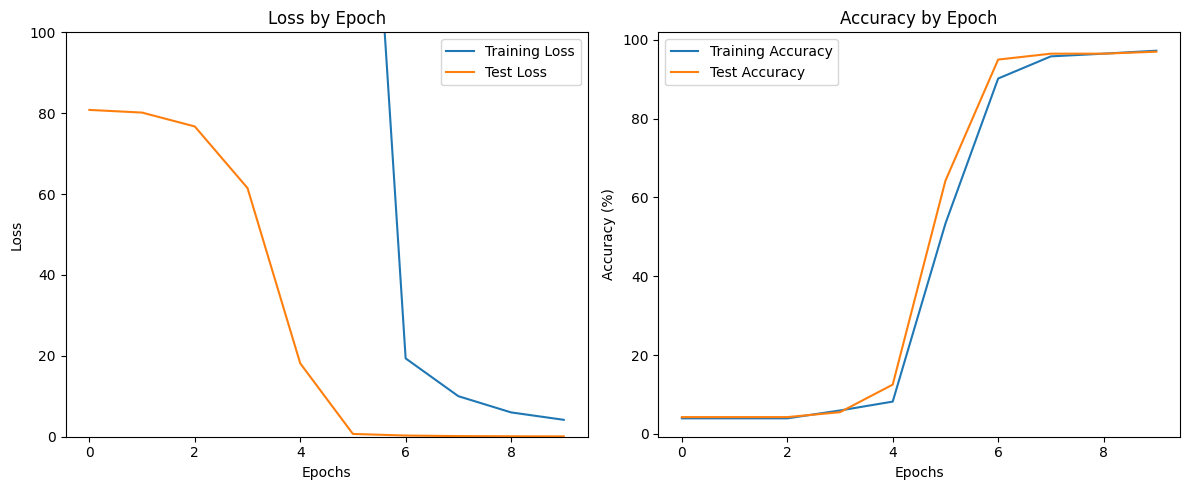

In [81]:
for i in range(10):

    df = createDataFrame(size = 2000)
    ANNModel, losses, accuracy, train_loader, test_loader, ANNModel, lossfun, optimizer = TrainModel(df, num_epochs=10, BatchSize=32, Use_ScalerMinMax= True,LearningRate=0.001,nUnits=12,nLayers=3,WeightDecay=0.05)
    print(f'Results of run: {i} completed')
    PlotResults()

In [54]:
def PlotResults():
    # Plotting losses
    plt.figure(figsize=(12, 5))

    # Training and Test Loss
    plt.subplot(1, 2, 1)
    plt.plot(losses[:, 0], label='Training Loss')
    plt.plot(losses[:, 1], label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 100)
    plt.title('Loss by Epoch')
    plt.legend()

    # Training and Test Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracy[:, 0], label='Training Accuracy')
    plt.plot(accuracy[:, 1], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy by Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

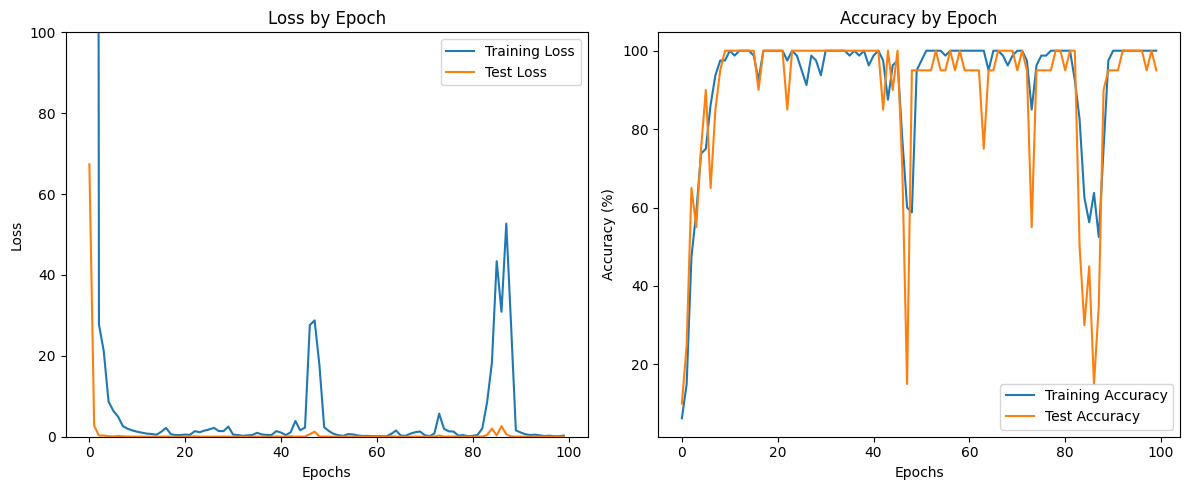

In [55]:
PlotResults()

Epoch 0 - Training Loss: nan - Test Loss: nan - Train Accuracy: nan% - Test Accuracy: nan%
Epoch 5 - Training Loss: 129.3459 - Test Loss: 83.0431 - Train Accuracy: 9.06% - Test Accuracy: 0.00%
Epoch 10 - Training Loss: 119.9061 - Test Loss: 77.6406 - Train Accuracy: 5.31% - Test Accuracy: 4.00%
Epoch 15 - Training Loss: 105.0735 - Test Loss: 61.3698 - Train Accuracy: 5.31% - Test Accuracy: 1.00%
Epoch 20 - Training Loss: 64.8489 - Test Loss: 31.8320 - Train Accuracy: 7.19% - Test Accuracy: 9.00%
Epoch 25 - Training Loss: 51.6202 - Test Loss: 16.5768 - Train Accuracy: 15.00% - Test Accuracy: 4.00%
Epoch 30 - Training Loss: 37.1798 - Test Loss: 13.6345 - Train Accuracy: 14.69% - Test Accuracy: 8.00%
Epoch 35 - Training Loss: 32.2280 - Test Loss: 11.5585 - Train Accuracy: 18.44% - Test Accuracy: 19.00%
Epoch 40 - Training Loss: 28.0253 - Test Loss: 9.7168 - Train Accuracy: 23.75% - Test Accuracy: 28.00%
Epoch 45 - Training Loss: 22.0124 - Test Loss: 8.0426 - Train Accuracy: 32.81% - Test 

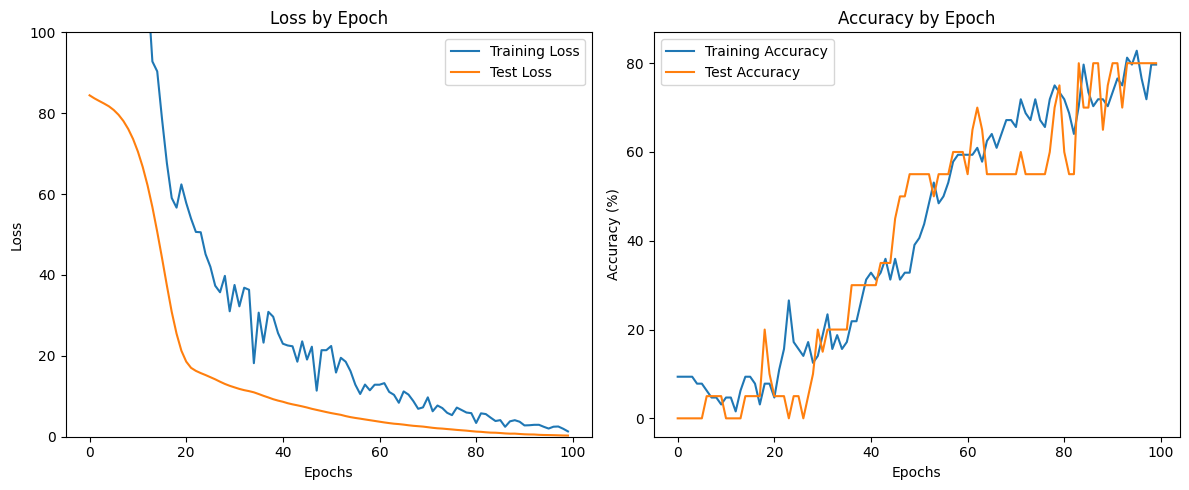

In [64]:
df = createDataFrame(size = 100)
ANNModel, losses, accuracy, train_loader, test_loader, ANNModel, lossfun, optimizer = TrainModel(df, BatchSize = 32, TestSize = .2, Shuffle = True, DropLast = True, Use_ScalerMinMax = False, Use_ScalerStandard = True)
PlotResults()

In [46]:
X, y = next(iter(test_loader))
with torch.no_grad():
    yHat = ANNModel(X)

In [50]:
for pred in range(len(y)):
    print(f'Prediction: {torch.round(yHat[pred]).item()} - Actual: {y[pred].item()}')

Prediction: -4.0 - Actual: -4.0
Prediction: -14.0 - Actual: -14.0
Prediction: -9.0 - Actual: -9.0
Prediction: 16.0 - Actual: 16.0
Prediction: 12.0 - Actual: 12.0
Prediction: -9.0 - Actual: -9.0
Prediction: 0.0 - Actual: 1.0
Prediction: 6.0 - Actual: 6.0
Prediction: -10.0 - Actual: -10.0
Prediction: 0.0 - Actual: 0.0
Prediction: 9.0 - Actual: 9.0
Prediction: 0.0 - Actual: 0.0
Prediction: -13.0 - Actual: -13.0
Prediction: 4.0 - Actual: 4.0
Prediction: 5.0 - Actual: 5.0
Prediction: 5.0 - Actual: 5.0
Prediction: 17.0 - Actual: 17.0
Prediction: -3.0 - Actual: -3.0
Prediction: -3.0 - Actual: -3.0
Prediction: -6.0 - Actual: -6.0
